In [146]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [147]:
import datetime
import warnings

warnings.filterwarnings("ignore")

In [148]:
df = pd.read_csv("train - train.csv")

df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


In [149]:
df["Order Date"] = df["Order Date"].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y"))
df["Sales"] = df["Sales"].apply(lambda x: float(x.replace(",", ".")))

In [150]:
max_date = max(df["Order Date"])
max_date

Timestamp('2018-12-30 00:00:00')

In [151]:
one_year = max_date - pd.DateOffset(years=1)
two_year = max_date - pd.DateOffset(years=2)
one_year

Timestamp('2017-12-30 00:00:00')

Решение задач

Задание 1

 а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
 
 б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
 
 в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?


Первые 10 самых популярных подгрупп товаров за все время

In [152]:
df["Sub-Category"].value_counts()[:10] / len(df)

Sub-Category
Binders        0.152245
Paper          0.136531
Furnishings    0.095000
Phones         0.089388
Storage        0.084898
Art            0.080102
Accessories    0.077143
Chairs         0.061939
Appliances     0.046837
Labels         0.036429
Name: count, dtype: float64

Первые 10 самых популярных подгрупп товаров за последние 2 года

In [153]:
df[df["Order Date"] >= two_year]["Sub-Category"].value_counts()[:10] / len(df[df["Order Date"] >= two_year])

Sub-Category
Binders        0.156164
Paper          0.139463
Furnishings    0.096074
Phones         0.087982
Storage        0.084711
Art            0.078857
Accessories    0.077479
Chairs         0.059917
Appliances     0.047176
Labels         0.035813
Name: count, dtype: float64

Первые 10 самых популярных подгрупп товаров за последний год

In [154]:
df[df["Order Date"] >= one_year]["Sub-Category"].value_counts()[:10] / len(df[df["Order Date"] >= one_year])

Sub-Category
Binders        0.151543
Paper          0.138711
Furnishings    0.094714
Phones         0.088909
Storage        0.086465
Art            0.086159
Accessories    0.081271
Chairs         0.057440
Appliances     0.049190
Labels         0.034830
Name: count, dtype: float64

Вывод: Категориям товаров из года в год (актуально с уходом вглубь до двух лет) свойственно оставаться на тех же позициях что и раньше
4 самых популярных это

Binders

Paper

Furnishings

Phones


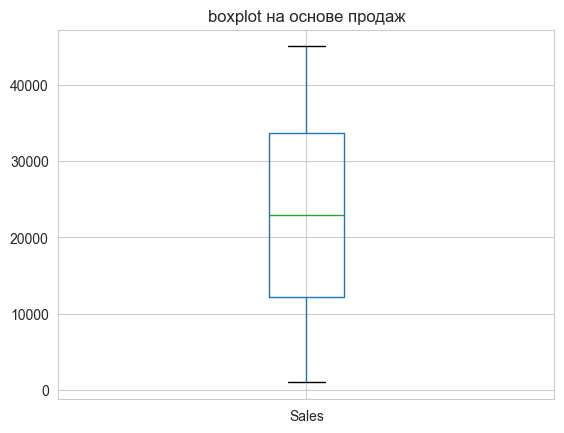

In [155]:
df.boxplot("Sales")
plt.title("boxplot на основе продаж")
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

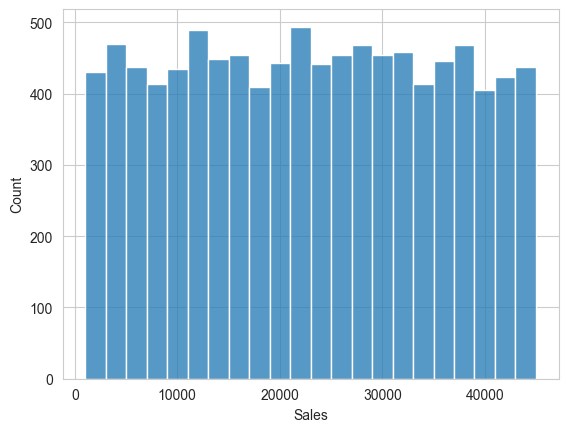

In [156]:
sns.histplot(df["Sales"])

Удалим выбросы методом межквартильного диапазона

In [157]:
def df_processing(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    print("lower_bound", lower_bound)
    print("upper_bound", upper_bound)
    df_res = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_res

In [158]:
print(f'Диапазон: {df["Sales"].min()}-{df["Sales"].max()}')

Диапазон: 1002.794-44995.41


In [159]:
df_modified = df_processing(df, "Sales")

lower_bound -52647.88999999999
upper_bound 98513.64499999999


In [160]:
print(f'Диапазон: {df_modified["Sales"].min()}-{df_modified["Sales"].max()}')

Диапазон: 1002.794-44995.41


In [161]:
print(f"Размер до {len(df)}")
print(f"Размер после {len(df_modified)}")

Размер до 9800
Размер после 9800


Датасет не изменился. Значит выбросов по значениям там нет. Поищем выбросы по моде

In [162]:
df["Sales"].round().value_counts()

Sales
14979.0    4
38704.0    4
5828.0     4
35324.0    4
18820.0    3
          ..
8487.0     1
37744.0    1
40181.0    1
41564.0    1
11726.0    1
Name: count, Length: 8759, dtype: int64

Выход номер два

In [163]:
def clean_2_way(df, column):
    majority_value = df[column].mode()[0]
    z_scores = np.abs(stats.zscore(df[column]))

    outliers = z_scores > 10
    df[column][outliers] = majority_value

    return df.copy(deep=True)

In [164]:
df_modified_2 = clean_2_way(df_modified, "Sales")
len(df_modified_2)

9800

Выбросы я так и не нашел. Скорее всего они отсутствуют в данных

 Задание 3
 Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
 
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


In [209]:
values = df['Sales'].max() - df['Sales'].min()
values = [values * 0.3, values * 0.6]
labels = ['Low Sales', 'Mid Sales', 'Big Sales']

df['Sale_group'] = [labels[0] if i < values[0] else \
                        labels[2] if i > values[1] else labels[1] for i in df["Sales"]]

<Axes: xlabel='Region', ylabel='total'>

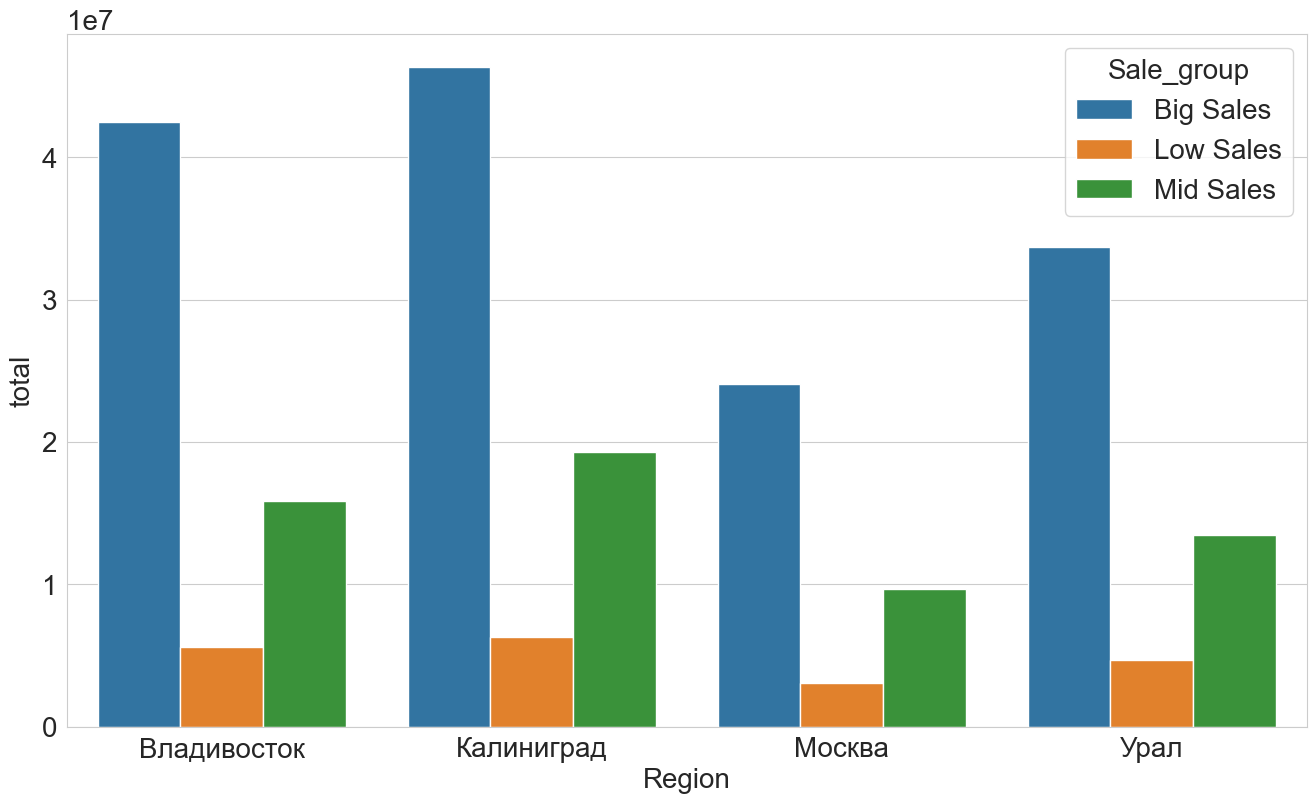

In [210]:
grouped = df.groupby(["Sale_group", "Region"]).agg(
    total=('Sales', 'sum'),
    count=('Sales', 'count')
).reset_index()

matplotlib.rcParams.update({'font.size': 20})
plt.figure(figsize=(16, 9))
sns.barplot(data=grouped, x='Region', y='total', hue='Sale_group')

In [203]:
grouped

,Sale_group,Region,total,count
0,Low Sales,Владивосток,7.643758e+06,933
1,Low Sales,Калиниград,8.702214e+06,1027
2,Low Sales,Москва,4.225440e+06,516
3,Low Sales,Урал,6.294823e+06,758
4,Mid Sales,Владивосток,1.992725e+07,877
5,Mid Sales,Калиниград,2.466447e+07,1082
6,Mid Sales,Москва,1.201696e+07,529
7,Mid Sales,Урал,1.685560e+07,746
8,Big Sales,Владивосток,3.638168e+07,975
9,Big Sales,Калиниград,3.856362e+07,1031
